In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import shap
import scikitplot as skplt
from mistune.plugins.math import math
from pyspark.sql.functions import avg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from catboost import CatBoostClassifier
from catboost import Pool

from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict

from scipy.stats import ks_2samp
from scipy.stats import describe
from imblearn.over_sampling import SMOTENC
from collections import Counter
from IPython.display import display

%matplotlib inline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
dataset_base_path = r'E:\PycharmProjects\pythonProject1\ToN-IoT-windows'


In [3]:
types = {
    'Processor_DPC_Rate': 'float64',
    'Processor_pct_Idle_Time': 'float64',
    'Processor_pct_C3_Time': 'float64',
    'Processor_pct_Interrupt_Time': 'float64',
    'Processor_pct_C2_Time': 'float64',
    'Processor_pct_User_Time': 'float64',
    'Processor_pct_C1_Time': 'float64',
    'Processor_pct_Processor_Time': 'float64',
    'Processor_C1_ransitions_sec': 'float64',
    'Processor_pct_DPC_Time': 'float64',
    'Processor_C2_ransitions_sec': 'float64',
    'Processor_pct_Privileged_Time': 'float64',
    'Processor_C3_ransitions_sec': 'float64',
    'Processor_DPCs_Queued_sec': 'float64',
    'Processor_Interrupts_sec': 'float64',
    'Process_Pool_Paged Bytes': 'float64',
    'Process_IO Read_Operations_sec': 'float64',
    'Process_Working_Set_Private': 'float64',
    'Process_Working_Set_Peak': 'float64',
    'Process_IO_Write Operations_sec': 'float64',
    'Process_Page_File Bytes': 'float64',
    'Process_pct_User_Time': 'float64',
    'Process_Virtual_Bytes Peak': 'float64',
    'Process_Page_File Bytes Peak': 'float64',
    'Process_IO_Other_Bytes_sec': 'float64',
    'Process_Private_Bytes': 'float64',
    'Process_IO_Write_Bytes_sec': 'float64',
    'Process_Elapsed_Time': 'float64',
    'Process_Virtual_Bytes': 'float64',
    'Process_pct_Processor_Time': 'float64',
    'Process_Creating Process ID': 'float64',
    'Process_Pool Nonpaged Bytes': 'float64',
    'Process_Working Set': 'float64',
    'Process_Page Faults_sec': 'float64',
    'Process_ID Process': 'float64',
    'Process_IO Other Operations_sec': 'float64',
    'Process_IO Data Operations_sec': 'float64',
    'Process_Thread Count': 'float64',
    'Process_pct_Privileged_Time': 'float64',
    'Process_IO Data Bytes_sec': 'float64',
    'Process_IO Read Bytes_sec': 'float64',
    'Process_Priority Base': 'float64',
    'Process_Handle Count': 'float64',
    'Network_I(Intel R _82574L_GNC)TCP_APS': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Received Unknown': 'float64',
    'Network_I(Intel R _82574L_GNC) Bytes Received sec': 'float64',
    'Network_I(Intel R _82574L_GNC) Bytes Sent sec': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Outbound Errors': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Received Discarded': 'float64',
    'Network_I(Intel R _82574L_GNC) Bytes Total sec': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Outbound Discarded': 'float64',
    'Network_I(Intel R _82574L_GNC) TCP RSC Exceptions sec': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Sent Unicast sec': 'float64',
    'Network_I(Intel R _82574L_GNC) Output Queue Length': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Received sec': 'float64',
    'Network_I(Intel R _82574L_GNC) Current Bandwidth': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets sec': 'float64',
    'Network_I(Intel R _82574L_GNC) TCP Active RSC Connections': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Sent sec': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Received Unicast sec': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Sent Non-Unicast sec': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Received Non-Unicast sec': 'float64',
    'Network_I(Intel R _82574L_GNC) TCP RSC Coalesced Packets sec': 'float64',
    'Network_I(Intel R _82574L_GNC) Offloaded Connections': 'float64',
    'Network_I(Intel R _82574L_GNC) Packets Received Errors': 'float64',
    'Memory Pool Paged Bytes': 'float64',
    'Memory Free & Zero Page List Bytes': 'float64',
    'Memory Cache Bytes Peak': 'float64',
    'Memory System Code Resident Bytes': 'float64',
    'Memory Available Bytes': 'float64',
    'Memory Commit Limit': 'float64',
    'Memory Transition Pages RePurposed sec': 'float64',
    'Memory Pages Output sec': 'float64',
    'Memory Page Reads sec': 'float64',
    'Memory Demand Zero Faults sec': 'float64',
    'Memory Available KBytes': 'float64',
    'Memory Pages sec': 'float64',
    'Memory Cache Bytes': 'float64',
    'Memory Pool Nonpaged Bytes': 'float64',
    'Memory Page Faults sec': 'float64',
    'Memory Transition Faults sec': 'float64',
    'Memory System Cache Resident Bytes': 'float64',
    'Memory Long-Term Average Standby Cache Lifetime (s)': 'float64',
    'Memory Standby Cache Reserve Bytes': 'float64',
    'Memory Page Writes sec': 'float64',
    'Memory System Code Total Bytes': 'float64',
    'Memory Standby Cache Core Bytes': 'float64',
    'Memory System Driver Resident Bytes': 'float64',
    'Memory Standby Cache Normal Priority Bytes': 'float64',
    'Memory Pool Paged Allocs': 'float64',
    'Memory Pool Nonpaged Allocs': 'float64',
    'Memory pct_Committed Bytes In Use': 'float64',
    'Memory Free System Page Table Entries': 'float64',
    'Memory Available MBytes': 'float64',
    'Memory Modified Page List Bytes': 'float64',
    'Memory Cache Faults sec': 'float64',
    'Memory Committed Bytes': 'float64',
    'Memory System Driver Total Bytes': 'float64',
    'Memory Pages Input sec': 'float64',
    'Memory Pool Paged Resident Bytes': 'float64',
    'Memory Write Copies sec': 'float64',
    'LogicalDisk(_Total) Avg  Disk Bytes Write': 'float64',
    'LogicalDisk(_Total) pct_ Idle Time': 'float64',
    'LogicalDisk(_Total) Disk Reads sec': 'float64',
    'LogicalDisk(_Total) pct_ Free Space': 'float64',
    'LogicalDisk(_Total) Disk Read Bytes sec': 'float64',
    'LogicalDisk(_Total) Avg  Disk sec Read': 'float64',
    'LogicalDisk(_Total) Disk Writes sec': 'float64',
    'LogicalDisk(_Total) Current Disk Queue Length': 'float64',
    'LogicalDisk(_Total) Split IO Sec': 'float64',
    'LogicalDisk(_Total) Free Megabytes': 'float64',
    'LogicalDisk(_Total) Avg  Disk sec Write': 'float64',
    'LogicalDisk(_Total) Disk Bytes sec': 'float64',
    'LogicalDisk(_Total) Avg  Disk Read Queue Length': 'float64',
    'LogicalDisk(_Total) pct_ Disk Time': 'float64',
    'LogicalDisk(_Total) Avg  Disk Bytes Read': 'float64',
    'LogicalDisk(_Total) Avg  Disk Write Queue Length': 'float64',
    'LogicalDisk(_Total) Avg  Disk Queue Length': 'float64',
    'LogicalDisk(_Total) pct_ Disk Read Time': 'float64',
    'LogicalDisk(_Total) Disk Write Bytes sec': 'float64',
    'LogicalDisk(_Total) Disk Transfers sec': 'float64',
    'LogicalDisk(_Total) Avg  Disk Bytes Transfer': 'float64',
    'LogicalDisk(_Total) pct_ Disk Write Time': 'float64',
    'LogicalDisk(_Total) Avg  Disk sec Transfer': 'float64',
    'label': 'object'
}
def replace_infinity_with_mean(df):
    inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]
    for col in inf_columns:
        df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
    return df


def replace_negative_values_with_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.values

    columns = [c for c in numeric_cols if df[df[c] < 0][c].count() > 0]
    for col in columns:
        mask = df[col] < 0
        df.loc[mask, col] = np.nan
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
    return df

def drop_nan_columns(df):
    cols = df.columns[df.isna().all()].tolist()
    print(f"columns {cols} were dropped due to NaN values")
    return df.drop(columns=cols)

def load_dataset(files, dtypes, cols=None):
    df = pd.concat((pd.read_csv(f, dtype=dtypes, usecols=cols,na_values=[' ', '']) for f in files))
    # check number of NaN values
    print('NaN values before cleaning')
    print(df.isna().sum())
    df = replace_infinity_with_mean(df)
    df = replace_negative_values_with_mean(df)
    #check number of NaN values
    print('NaN values after cleaning')
    print(df.isna().sum())
    df = drop_nan_columns(df)
    return df

In [4]:
csv_files = glob.glob(os.path.join(dataset_base_path, '*.csv'))

df = load_dataset(csv_files, types)
df

NaN values before cleaning
Processor_DPC_Rate                              0
Processor_pct_ Idle_Time                        5
Processor_pct_ C3_Time                          5
Processor_pct_ Interrupt_Time                   5
Processor_pct_ C2_Time                          5
                                               ..
LogicalDisk(_Total) Disk Transfers sec          5
LogicalDisk(_Total) Avg  Disk Bytes Transfer    5
LogicalDisk(_Total) pct_ Disk Write Time        5
LogicalDisk(_Total) Avg  Disk sec Transfer      5
label                                           0
Length: 125, dtype: int64
NaN values after cleaning
Processor_DPC_Rate                              0
Processor_pct_ Idle_Time                        5
Processor_pct_ C3_Time                          5
Processor_pct_ Interrupt_Time                   5
Processor_pct_ C2_Time                          5
                                               ..
LogicalDisk(_Total) Disk Transfers sec          5
LogicalDisk(_Total) A

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label
0,0.0,49.072449,0.0,0.779672,0.0,21.830814,49.072449,45.578899,405.210993,0.155934,...,16384.00000,0.035544,0.035728,0.006139,9.807255e+05,61.120654,16125.911910,1.184789,0.000584,1
1,17.0,0.000000,0.0,1.170523,0.0,38.159043,0.000000,100.000000,0.000000,2.419080,...,22478.22222,0.071869,0.113429,1.389685,6.954375e+05,56.840424,17923.599300,2.403132,0.001996,1
2,11.0,0.000000,0.0,0.546510,0.0,65.112770,0.000000,100.000000,0.000000,0.312291,...,24104.96000,0.010272,0.023255,0.432791,6.913414e+05,9.388015,86462.638300,0.342387,0.002476,1
3,0.0,0.000000,0.0,0.780817,0.0,68.946112,0.000000,100.000000,0.000000,1.015062,...,10967.57895,0.062089,0.070302,0.273779,1.039903e+06,81.894394,13206.974360,2.069629,0.000859,1
4,0.0,0.000000,0.0,0.468740,0.0,66.014212,0.000000,100.000000,0.000000,0.156247,...,16131.13469,0.100304,0.123923,0.787313,2.498189e+06,190.171748,15214.368030,3.343468,0.000652,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21099,0.0,48.025911,0.0,0.234004,0.0,43.524767,48.025911,50.079120,147.567189,0.156003,...,23210.66667,0.001009,0.001144,0.004492,1.185969e+04,1.297952,14493.538460,0.033628,0.000881,1
21100,0.0,63.662718,0.0,0.078246,0.0,30.750568,63.662718,34.351842,165.855559,0.000000,...,65536.00000,0.001485,0.001534,0.001636,2.994694e+04,4.306636,8477.767442,0.049489,0.000356,1
21101,1.0,82.341507,0.0,0.000000,0.0,15.210830,82.341507,16.301435,189.607120,0.000000,...,0.00000,0.000448,0.000448,0.000000,1.518295e+04,1.497687,10137.600000,0.014922,0.000299,1
21102,0.0,38.792680,0.0,0.156246,0.0,23.046274,38.792680,59.844797,172.995329,0.156246,...,32768.00000,0.000618,0.000690,0.002423,1.269726e+04,0.899976,17749.333330,0.020592,0.000767,1


In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

In [6]:
X = df[numerical_cols]
# Replace NaN in X before calculating the correlation
X = X.fillna(X.mean())

In [7]:
y = df[['label']]

In [8]:
y.label.value_counts()

label
1    11104
0    10000
Name: count, dtype: int64

In [9]:
X

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) pct_ Disk Time,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer
0,0.0,49.072449,0.0,0.779672,0.0,21.830814,49.072449,45.578899,405.210993,0.155934,...,1.190928,16384.00000,0.035544,0.035728,0.006139,9.807255e+05,61.120654,16125.911910,1.184789,0.000584
1,17.0,0.000000,0.0,1.170523,0.0,38.159043,0.000000,100.000000,0.000000,2.419080,...,3.792816,22478.22222,0.071869,0.113429,1.389685,6.954375e+05,56.840424,17923.599300,2.403132,0.001996
2,11.0,0.000000,0.0,0.546510,0.0,65.112770,0.000000,100.000000,0.000000,0.312291,...,0.775178,24104.96000,0.010272,0.023255,0.432791,6.913414e+05,9.388015,86462.638300,0.342387,0.002476
3,0.0,0.000000,0.0,0.780817,0.0,68.946112,0.000000,100.000000,0.000000,1.015062,...,2.343409,10967.57895,0.062089,0.070302,0.273779,1.039903e+06,81.894394,13206.974360,2.069629,0.000859
4,0.0,0.000000,0.0,0.468740,0.0,66.014212,0.000000,100.000000,0.000000,0.156247,...,4.130782,16131.13469,0.100304,0.123923,0.787313,2.498189e+06,190.171748,15214.368030,3.343468,0.000652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21099,0.0,48.025911,0.0,0.234004,0.0,43.524767,48.025911,50.079120,147.567189,0.156003,...,0.038120,23210.66667,0.001009,0.001144,0.004492,1.185969e+04,1.297952,14493.538460,0.033628,0.000881
21100,0.0,63.662718,0.0,0.078246,0.0,30.750568,63.662718,34.351842,165.855559,0.000000,...,0.051125,65536.00000,0.001485,0.001534,0.001636,2.994694e+04,4.306636,8477.767442,0.049489,0.000356
21101,1.0,82.341507,0.0,0.000000,0.0,15.210830,82.341507,16.301435,189.607120,0.000000,...,0.014921,0.00000,0.000448,0.000448,0.000000,1.518295e+04,1.497687,10137.600000,0.014922,0.000299
21102,0.0,38.792680,0.0,0.156246,0.0,23.046274,38.792680,59.844797,172.995329,0.156246,...,0.023015,32768.00000,0.000618,0.000690,0.002423,1.269726e+04,0.899976,17749.333330,0.020592,0.000767


In [10]:
y.value_counts()

label
1        11104
0        10000
Name: count, dtype: int64

In [11]:
stats = X.describe()
std = stats.loc['std']
features_no_variance = std[std == 0.0].index
pd.Series(features_no_variance).sort_values()

17    Network_I(Intel R _82574L_GNC) Offloaded Conne...
13    Network_I(Intel R _82574L_GNC) Output Queue Le...
11    Network_I(Intel R _82574L_GNC) Packets Outboun...
9     Network_I(Intel R _82574L_GNC) Packets Outboun...
10    Network_I(Intel R _82574L_GNC) Packets Receive...
18    Network_I(Intel R _82574L_GNC) Packets Receive...
15    Network_I(Intel R _82574L_GNC) Packets Receive...
8     Network_I(Intel R _82574L_GNC) Packets Receive...
14    Network_I(Intel R _82574L_GNC) Packets Sent No...
16    Network_I(Intel R _82574L_GNC) TCP RSC Coalesc...
12    Network_I(Intel R _82574L_GNC) TCP RSC Excepti...
5                           Process_Creating Process ID
4                                  Process_Elapsed_Time
6                                    Process_ID Process
7                                 Process_Priority Base
2                           Processor_C2_ransitions_sec
3                           Processor_C3_ransitions_sec
1                                Processor_pct_ 

In [12]:
X = X.drop(columns=features_no_variance)


In [13]:
X.shape

(21104, 105)

In [14]:
y.shape

(21104, 1)

In [15]:
from sklearn.metrics import pairwise_distances



numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

try:
    distance_matrix = pairwise_distances(df[numerical_cols], metric='euclidean')
    print("Distance matrix calculated successfully")
except ValueError as e:
    print(f"Error calculating distance matrix: {e}")

Error calculating distance matrix: Input contains NaN.


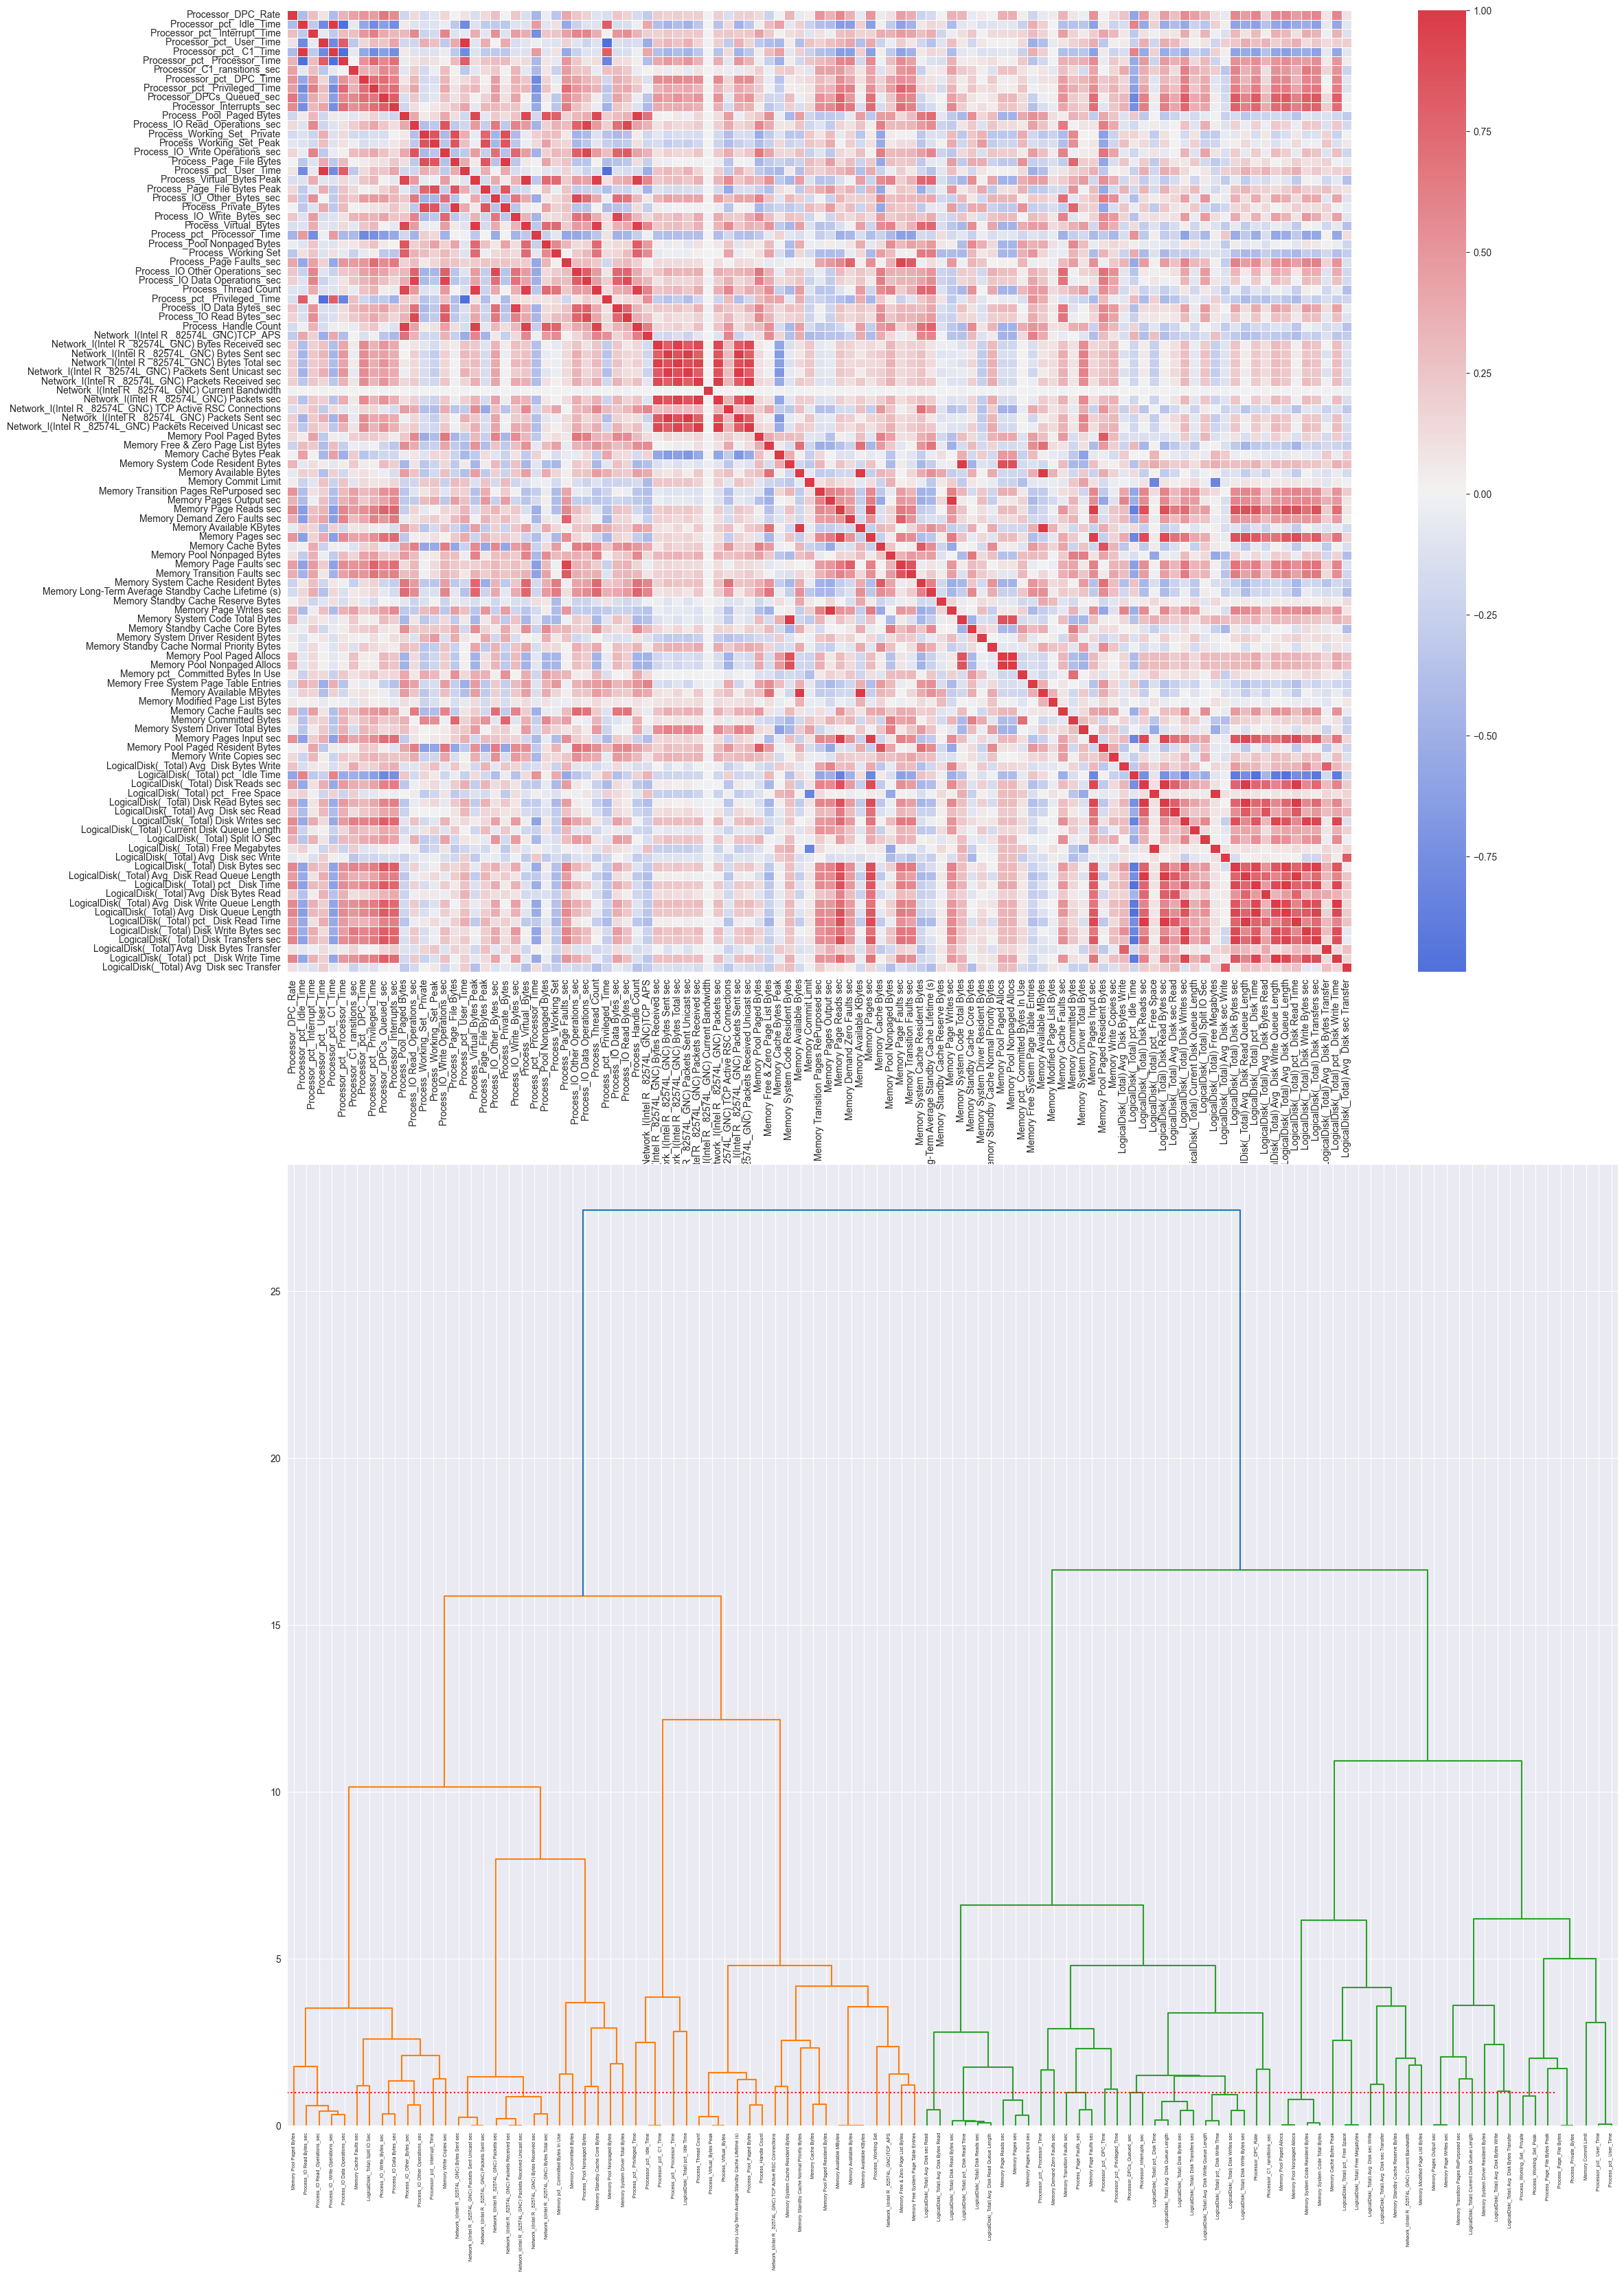

In [16]:
cluster_threshold = 1

corr = spearmanr(X).correlation
corr_linkage = hierarchy.ward(corr)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 40))

sns.heatmap(corr, xticklabels=X.columns, yticklabels=X.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True), ax=ax1)

dendro = hierarchy.dendrogram(corr_linkage, labels=X.columns, ax=ax2, leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))
ax2.plot([0, 1000], [cluster_threshold, cluster_threshold], ':r')
plt.show()

In [17]:
cluster_ids = hierarchy.fcluster(corr_linkage, cluster_threshold, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)

for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

selected_features = X.columns[selected_features].tolist()

print('Selected features:')
pd.Series(selected_features)

Selected features:


0                               Processor_DPC_Rate
1                         Processor_pct_ Idle_Time
2                    Processor_pct_ Interrupt_Time
3                         Processor_pct_ User_Time
4                    Processor_pct_ Processor_Time
                          ...                     
61                LogicalDisk(_Total) Split IO Sec
62         LogicalDisk(_Total) Avg  Disk sec Write
63              LogicalDisk(_Total) Disk Bytes sec
64    LogicalDisk(_Total) Avg  Disk Bytes Transfer
65      LogicalDisk(_Total) Avg  Disk sec Transfer
Length: 66, dtype: object

In [18]:
X = X[selected_features]
print(f"Remaining amount of features: {len(X.columns)}")

Remaining amount of features: 66


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)



In [20]:
unique_classes = np.unique(y_train)
class_weights = {cls: len(y_train) / np.sum(y_train == cls) for cls in unique_classes}
print(f"Class weights: {class_weights}")

Class weights: {'0': label    2.110375
dtype: float64, '1': label    1.900597
dtype: float64}


The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)


In [21]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=1300,
    learning_rate=0.2,
    depth=9,
    loss_function='MultiClass',
    task_type='GPU',
    verbose=20,
    random_seed=42,
    l2_leaf_reg=2,
    border_count=512,
    early_stopping_rounds=150,
    eval_metric='TotalF1',
    leaf_estimation_iterations=10,
    bagging_temperature=1.0,
    class_weights=list(class_weights.values()),

)

# Train the model
model.fit(X_train, y_train)


0:	learn: 1.0000000	total: 107ms	remaining: 2m 18s
20:	learn: 1.0000000	total: 270ms	remaining: 16.5s
40:	learn: 1.0000000	total: 346ms	remaining: 10.6s
60:	learn: 1.0000000	total: 410ms	remaining: 8.33s
80:	learn: 1.0000000	total: 625ms	remaining: 9.41s
100:	learn: 1.0000000	total: 1.15s	remaining: 13.7s
120:	learn: 1.0000000	total: 1.72s	remaining: 16.8s
140:	learn: 1.0000000	total: 2.26s	remaining: 18.6s
160:	learn: 1.0000000	total: 2.82s	remaining: 19.9s
180:	learn: 1.0000000	total: 3.37s	remaining: 20.8s
200:	learn: 1.0000000	total: 4.3s	remaining: 23.5s
220:	learn: 1.0000000	total: 5.5s	remaining: 26.9s
240:	learn: 1.0000000	total: 6.39s	remaining: 28.1s
260:	learn: 1.0000000	total: 7.1s	remaining: 28.3s
280:	learn: 1.0000000	total: 8.05s	remaining: 29.2s
300:	learn: 1.0000000	total: 8.86s	remaining: 29.4s
320:	learn: 1.0000000	total: 9.62s	remaining: 29.3s
340:	learn: 1.0000000	total: 10.2s	remaining: 28.7s
360:	learn: 1.0000000	total: 11.2s	remaining: 29.1s
380:	learn: 1.000000

In [22]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2221

    accuracy                           1.00      4221
   macro avg       1.00      1.00      1.00      4221
weighted avg       1.00      1.00      1.00      4221



In [28]:
class_names = [
    "0",
    "1"

]


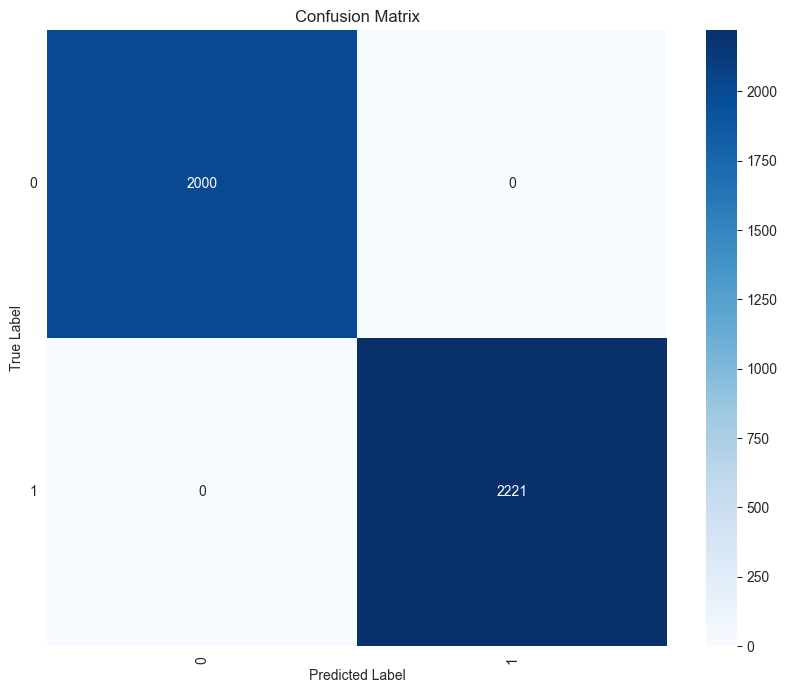

In [29]:
from sklearn.metrics import confusion_matrix


# Ensure y_test has the same type as y_pred
y_test = y_test.astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)  # Rotate X-axis labels for readability if they are long
plt.yticks(rotation=0)
plt.show()


In [23]:
y_test.shape

(4221, 1)

In [24]:
y_pred.shape

(4221, 1)

In [25]:
target_names = [      0,1
]


In [26]:
from prettytable import PrettyTable
from sklearn.metrics import precision_recall_fscore_support

def display_metrics_table(y_true, y_pred):
    # Convert y_true to numpy array if it's a DataFrame
    if hasattr(y_true, 'values'):
        y_true = y_true.values

    # Flatten y_true to match the shape of y_pred
    y_true = y_true.ravel()

    # Convert y_true to integers to match y_pred
    y_true = y_true.astype(int)

    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred)

    # Create a table
    table = PrettyTable()
    table.field_names = ["Class", "Precision", "Recall", "F1-score", "Support"]

    for i, (p, r, f, s) in enumerate(zip(precision, recall, f1, support)):
        table.add_row([f"Class {i}", f"{p:.6f}", f"{r:.6f}", f"{f:.6f}", s])

    print(table)

    # Calculate accuracy
    accuracy = (y_pred == y_true).sum() / len(y_true)
    print(f"\nOverall Accuracy: {accuracy:.6f}")

# Convert y_test to a numpy array if necessary, and flatten it
if hasattr(y_test, 'values'):
    y_test = y_test.values

y_test = y_test.ravel()

# Convert y_test from strings to integers
y_test = y_test.astype(int)

y_pred = model.predict(X_test).ravel()
y_pred = y_pred.astype(int)

display_metrics_table(y_test, y_pred)


+---------+-----------+----------+----------+---------+
|  Class  | Precision |  Recall  | F1-score | Support |
+---------+-----------+----------+----------+---------+
| Class 0 |  1.000000 | 1.000000 | 1.000000 |   2000  |
| Class 1 |  1.000000 | 1.000000 | 1.000000 |   2221  |
+---------+-----------+----------+----------+---------+

Overall Accuracy: 1.000000


In [176]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
# Assuming you have your data in a pandas DataFrame called 'df'
# X is your feature matrix, y is your target labels
# Example data, replace with your actual data loading

# Convert labels to numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Initialize CatBoostClassifier with your specified parameters
model = CatBoostClassifier(
    iterations=1300,
    learning_rate=0.2,
    depth=9,
    loss_function='MultiClass',
    task_type='GPU',
    verbose=0,
    random_seed=42,
    l2_leaf_reg=2,
    border_count=512,
    early_stopping_rounds=150,
    eval_metric='TotalF1',
    leaf_estimation_iterations=10,
    bagging_temperature=1.0
)

# Set up stratified k-fold cross-validation (k=5)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to hold all the results from the cross-validation
all_precisions = []
all_recalls = []
all_f1s = []

# Perform stratified k-fold cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")

    # Split the data into training and test sets for each fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_train = y_train
    y_test = y_test


    # Train the model
    model.fit(X_train, y_train, verbose=0)

    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1s.append(f1)


mean_precision = np.mean(all_precisions)
mean_recall = np.mean(all_recalls)
mean_f1 = np.mean(all_f1s)

print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")



y_pred_all_training_set = model.predict_proba(X)

print(y_pred_all_training_set)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean Precision: 1.0000
Mean Recall: 1.0000
Mean F1-Score: 1.0000
[[3.72089771e-07 9.99999628e-01]
 [1.33833277e-06 9.99998662e-01]
 [1.30402408e-06 9.99998696e-01]
 ...
 [1.87050380e-07 9.99999813e-01]
 [1.87050380e-07 9.99999813e-01]
 [1.87050380e-07 9.99999813e-01]]
